In [1]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [29]:
path = 'c:\\Users\\Tang\\OneDrive - University of Bristol\\MSc project\\Project\\Causal_Relationship_Inferring\\'

filename = 'data/output_populations_5-3000.csv'
filename2 = 'data/output_pops_E.csv'
st = 1000
ed = 2000
maxlag = 1

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']
dfS_3 = df['3']
dfS_4 = df['4']
dfS_5 = df['5']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3, 'species_4': dfS_4, 'species_5': dfS_5})
#col_names = df.columns

print(df.head(10))

iteration  species_1  species_2  species_3  species_4  species_5
1000       1001        992       1590      14827       8401        101
1001       1002        965       1532      14939       8364        101
1002       1003        947       1476      15088       8346         86
1003       1004        908       1434      15219       8310         87
1004       1005        871       1438      15342       8271         83
1005       1006        814       1371      15467       8251         94
1006       1007        756       1303      15588       8248         98
1007       1008        742       1276      15698       8230         87
1008       1009        671       1224      15807       8213         86
1009       1010        643       1205      15882       8226         83


In [30]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(dfS_1, autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('The given series data is stable if Test Statistics < Critical Value')

Dickey-Fuller Test:
Test Statistics        -5.921304e+00
p-Value                 2.502756e-07
#Lags used              1.600000e+01
Observ used             9.830000e+02
Critical Value (1%)    -3.437020e+00
Critical Value (5%)    -2.864485e+00
Critical Value (10%)   -2.568338e+00
dtype: float64
The given series data is stable if Test Statistics < Critical Value




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0632  , p=0.8015  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=0.0634  , p=0.8012  , df=1
likelihood ratio test: chi2=0.0634  , p=0.8012  , df=1
parameter F test:         F=0.0632  , p=0.8015  , df_denom=996, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8836  , p=0.0898  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=2.8923  , p=0.0890  , df=1
likelihood ratio test: chi2=2.8881  , p=0.0892  , df=1
parameter F test:         F=2.8836  , p=0.0898  , df_denom=996, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=629.1782, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=631.0733, p=0.0000  , df=1
likelihood ratio test: chi2=489.1358, p=0.0000  , df=1
parameter F test:         F=629.1782, p=0.0000  , df_denom=996, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero) 1


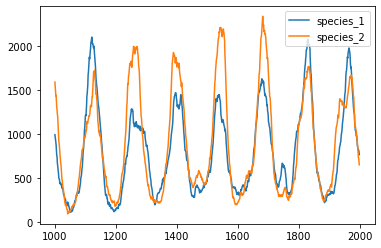

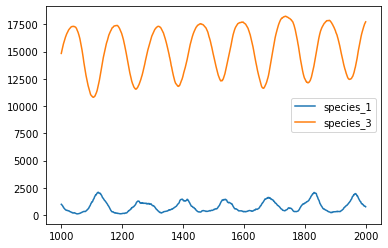

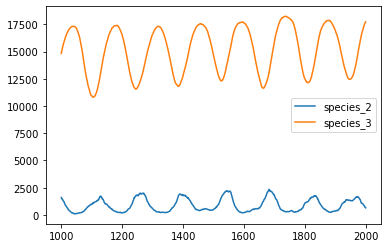

In [39]:
def GCT(dataframe):
    print('\n\n1 eats 2?')
    grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=[maxlag])
    print('\n\n2 eats 1?')
    grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=[maxlag])
    dataframe[['species_1', 'species_2']].plot()

    print('\n\n1 eats 3?')
    grangercausalitytests(dataframe[['species_1', 'species_3']], maxlag=[maxlag])
    print('\n\n3 eats 1?')
    grangercausalitytests(dataframe[['species_3', 'species_1']], maxlag=[maxlag])
    dataframe[['species_1', 'species_3']].plot()

    print('\n\n2 eats 3?')
    grangercausalitytests(dataframe[['species_2', 'species_3']], maxlag=[maxlag])
    print('\n\n3 eats 2?')
    grangercausalitytests(dataframe[['species_3', 'species_2']], maxlag=[maxlag])
    dataframe[['species_2', 'species_3']].plot()
    
    #print('\n\n5 eats 3?')
    #grangercausalitytests(dataframe[['5', '3']], maxlag=[50])
    #print('\n\n3 eats 5?')
    #grangercausalitytests(dataframe[['3', '5']], maxlag=[50])
    #print('\n\n1 eats 4?')
    #grangercausalitytests(dataframe[['1', '4']], maxlag=[100])
    #print('\n\n4 eats 1?')
    #grangercausalitytests(dataframe[['4', '1']], maxlag=[100])
    #print('\n\n2 eats 4?')
    #grangercausalitytests(dataframe[['2', '4']], maxlag=[100])
    #print('\n\n4 eats 2?')
    #grangercausalitytests(dataframe[['4', '2']], maxlag=[100])

    # ax = plt.gca()

    # dataframe.plot(x='iteration', y='species_1', kind='line', ax=ax)
    # dataframe.plot(x='iteration', y='species_2', kind='line', ax=ax)
    # dataframe.plot(x='iteration', y='species_3', kind='line', ax=ax)
    # dataframe.plot(x='iteration', y='species_4', kind='line', ax=ax)
    # dataframe.plot(x='iteration', y='species_5', kind='line', ax=ax)
    # plt.show()

GCT(df)

species_1  species_2  species_3  species_4  species_5
0   0.399318   1.174307  -0.136930  -2.277448   0.654320
1   0.345137   1.076486  -0.084049  -2.314163   0.654320
2   0.309017   0.982038  -0.013699  -2.332024  -0.031598
3   0.230755   0.911202   0.048153  -2.367745   0.014130
4   0.156507   0.917948   0.106227  -2.406444  -0.168782
5   0.042125   0.804948   0.165246  -2.426290   0.334225
6  -0.074264   0.690261   0.222376  -2.429267   0.517136
7  -0.102358   0.644724   0.274312  -2.447128   0.014130
8  -0.244834   0.557022   0.325777  -2.463996  -0.031598
9  -0.301022   0.524977   0.361188  -2.451097  -0.168782


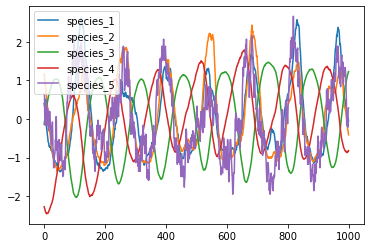

In [40]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2','species_3','species_4','species_5']].plot()
#scaled_df[['species_1','species_2']].plot()

species_1  species_2  species_3  species_4  species_5
0    0.399318   1.174307  -0.136930  -2.277448   0.654320
10  -0.383297   0.400171   0.407458  -2.444151   0.197041
20  -0.740491  -0.414443   0.766292  -2.299278  -0.168782
30  -0.977282  -0.977757   0.972621  -2.028387  -0.808972
40  -1.196013  -1.264474   1.034001  -1.521334  -0.031598
50  -1.342502  -1.313385   0.940515  -1.017258  -0.626060
60  -1.262234  -1.176772   0.549103  -0.486391  -1.220522
70  -1.007382  -1.004742  -0.151567  -0.040859  -0.900427
80  -0.870926  -0.658995  -1.001436   0.342159   1.111599
90  -0.333129  -0.126039  -1.625145   0.575344   1.157326


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9981  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9981  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9981  , df=1
parameter F test:         F=0.0000  , p=0.9981  , df_denom=96, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero

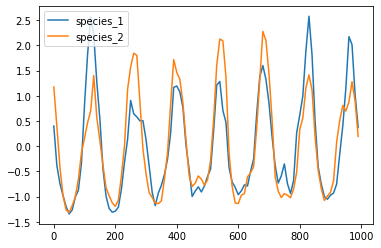

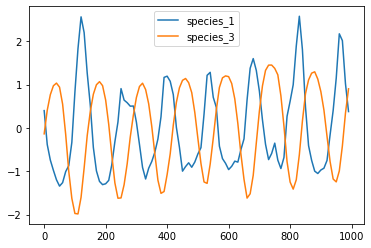

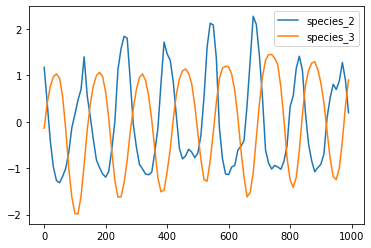

In [41]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

species_1  species_2  species_3  species_4  species_5
0     0.399318   1.174307  -0.136930  -2.277448   0.654320
50   -1.342502  -1.313385   0.940515  -1.017258  -0.626060
100   0.826747   0.162364  -1.974064   0.542599   1.660333
150   0.529754   0.110081   0.378185  -2.014495  -0.214509
200  -1.288321  -1.191952   0.642589  -0.234353  -0.854699
250   0.907015   1.572337  -1.614758   0.567406   0.562864
300   0.132427  -0.544309   0.701608  -1.044050  -0.671788
350  -0.774605  -1.082324   0.034932   0.722201  -0.717516
400   1.193974   1.464397  -1.074619   0.224079   1.340238
450  -0.997349  -0.798981   1.098213  -0.410978  -1.174795


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9601  , p=0.3417  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=1.1401  , p=0.2856  , df=1
likelihood ratio test: chi2=1.1072  , p=0.2927  , df=1
parameter F test:         F=0.9601  , p=0.3417  , df_denom=16, df_num=1


2 eats 1?

Granger Causality
number of lag

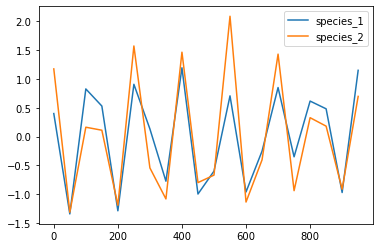

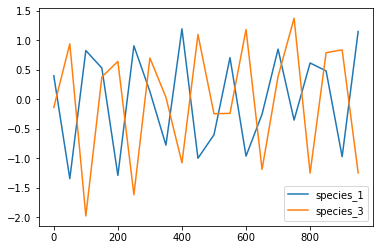

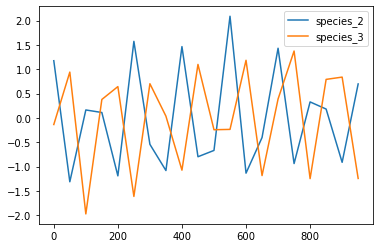

In [42]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)